# CAI Lab Session 1: Powerlaws

In this session you will:

- Learn about so-called power laws, a special case being Zipf's law
- Adjust a number of datasets to a power law
- Investigate whether words in text seem to fit power laws
- Discover Heaps' law, that tells how many words there are (usually) in a text of given size

## 1. Powerlaws

Consider a function $y=f(x)$, that we will call a "law" relating $y$ with $x$.

__Example 1.__ You are given a bucket of some radioactive isotope. $x$ is the number of seconds since you were given 
the bucket. $y$ is the number of atoms that disintegrate at the $x$th second. 
Each atom decides independently from all other atoms whether to disintegrate in the next second (or 
nanosecond, or whatever). From here you can see that $f$ will have the form $y=c \cdot a^{-x}$,
where $c$ depends on the number of atoms you were given, and $a$ depends on the isotope. In particular,
$a>1$ determines the half-life of the isotope. 

__Example 2.__ $x$ is number of seconds and $y$ is the number of people entering a metro station during the next
10 minutes. You may have been told in statistics that $f$ is given by the Poisson distribution 
(at least for ideal people and metro stations).

Many natural and artificial phenomena come in distributions that are neither exponential nor Poisson,
but so-called power laws. Intuitively, we have $y$ evolves like $x^a$, where $a$ is a constant called
the {\em exponent} of the power law. If $a$ is positive, $y$ is increasing, and if $a$ is negative, 
$y$ decreases.

More precisely, a power law is
$$
y = c \cdot (x+b)^a
$$ 
for three constants $a$, $b$, and $c$.

There is a lot of theory about why powerlaws are ubiqutous. They are often related to self-organization,
fractality, complex dynamical systems, etc. The Web and social networks are full of powerlaws. 
So is human language, social sciences (population of cities), and natural sciences (intensity of earthquakes,
relation of size and metabolism in animals). 

A powerlaw with exponent $-1$ is called Zipf's law, after Mr. Zipf. By extension, sometimes powerlaws with 
negative exponents are also called Zipfian laws.

In what follows we will fit some datasets to the best powerlaw that we can find - and see that they pretty close.
Note that this does NOT mean that the phenomenon generating the dataset is exactly a powerlaw.
Proving seriously that a law is (or is not) a powerlaw is another matter.


## 2. Distribution of family names

The file `apellidos.csv` found in this directory is taken from [here](http://www.ine.es/daco/daco42/nombyapel/apellidos_frecuencia.xls).
It gives family names in the Spanish census of 2015, sorted by frequence.

Here you can view the first lines of this file:

In [1]:
!head -n 5 apellidos.csv

---

__Exercise 1.__ Use `python` + `matplotlib` to plot the frequence of `apellidos` in decreasing order. 
More precisely, put the `Orden` column in the $x$ axis and the `Apellido 1` in the $y$ axis.
(In the csv, `;` is used as a separator, so you want to use `sep=';'` or `delimiter=';'` or so to read it).

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
apellidos = pd.read_csv('apellidos.csv', sep=';')
print(apellidos)
apellidos_sorted = apellidos.sort_values("Apellido 1",ascending=False)
print(apellidos_sorted)

       Orden   Apellido  Apellido 1  Apellido 2  Ambos apellidos
0          1     GARCIA     1473189     1489086            80494
1          2   GONZALEZ      927393      935408            41786
2          3  RODRIGUEZ      926148      934360            43397
3          4  FERNANDEZ      919724      929292            52364
4          5      LOPEZ      872744      879628            35185
...      ...        ...         ...         ...              ...
73886  74011    ZOTESCU          20           0                0
73887  74012    ZOUGANI          20           0                0
73888  74013    ZOUITEN          20           0                0
73889  74014      ZSIGA          20           0                0
73890  74015      ZUDOR          20           0                0

[73891 rows x 5 columns]
       Orden    Apellido  Apellido 1  Apellido 2  Ambos apellidos
0          1      GARCIA     1473189     1489086            80494
1          2    GONZALEZ      927393      935408            41

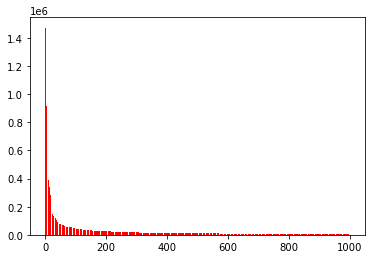

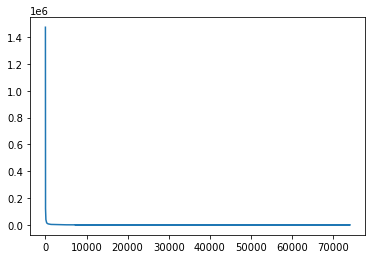

In [33]:
plt.bar(apellidos_sorted["Orden"][0:1000], apellidos_sorted ["Apellido 1"][0:1000], color = "red") #too much entries to process
plt.show()
plt.plot(apellidos_sorted["Orden"], apellidos_sorted ["Apellido 1"])
ax = plt.gca() #to do the posterior work
plt.show()

In [5]:
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
x_data [0]
y_data [0]

1473189


---

__Exercise 2.__ (joke) RESIST THE TEMPTATION to say that this is an exponential distribution _because it decrases very fast_.

--- 

Is it a powerlaw? Or, can it be approximated by a powerlaw?

A trick about powerlaws is the following. Let's forget about the $b$ parameter for a second (or equivalently assume that $b = 0$), 
so our powerlaw looks like 
$$
y = c \cdot x^a.
$$

Taking logs on both sides, it becomes
$$
\log y = a \cdot \log x + \log c
$$

I.e., $\log y$ is a linear function of $\log x$.

---


In [6]:
import numpy as np


---

__Exercise 3.__ Tell `matplotlib` to use _logarithmic_ $x$ and $y$ axes. 
([this](https://matplotlib.org/examples/pylab_examples/log_demo.html) may help).

---

If our distribution is a powerlaw, this plot should be a straight line, whose slope is $a$
and intercept is $\log c$. If we put back the $b$ parameter, it distorts a bit the 
low values, so in order to estimate $a$ and $c$ we have to pay attention to the large values. 

---


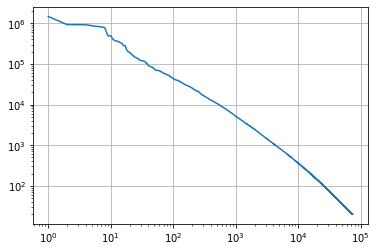

In [198]:
plt.loglog(apellidos_sorted["Orden"], apellidos_sorted["Apellido 1"])
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()


---

__Exercise 4.__ Let's find $a$ and $c$ analytically. 
Assume we have $\log y = a \cdot \log x + \log c$. 

Take two distinct _large_ values of $x$, find their corresponding values of $y$, 
set up a system of two linear equations, and solve for $a$ and $c$. 
The solution will probably not fit very well the low values of $x$. You can try to 
make it better by adding the $b$ parameter, but don't agonize over it.

---


In [107]:
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[100])
y1 = np.log10(y_data[100])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[70000])
y2 = np.log10(y_data[70000])
print("log(x2) =", x2)
print("log(y2) =", y2)

Get x1 and y1:
log(x1) = 2.0043213737826426
log(y1) = 4.640113571929359
Get x2 and y2:
log(x2) = 4.8497141671469866
log(y2) = 1.3222192947339193


In [ ]:
from sympy import symbols, Eq, solve
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = sol[a]
c = pow(10, sol[c])
print ("a =", a, "c =", c)


---

__Exercise 5.__ If $(x_1, y_1)$ is the first point you have selected, and $(x_2, y_2)$ the second one, 
find expressions for $a$ and $c$ (assume $b=0$). 

---


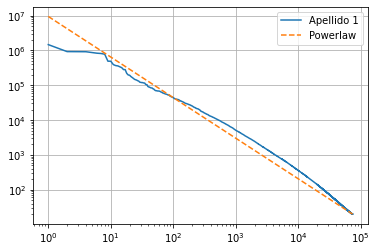

R2:  0.37372096748679995
R2 from observation num 100:  0.88425632175279


In [109]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
plt.loglog(apellidos_sorted["Orden"], apellidos_sorted["Apellido 1"], label = "Apellido 1")
y = c*apellidos_sorted["Orden"]**a
plt.plot(apellidos_sorted["Orden"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
y_true = apellidos_sorted["Apellido 1"]
print("R2: ", r2_score(y, y_true))
print("R2 from observation num 100: ", r2_score(y[100:], y_true[100:]))

## 3. Distribution of river lengths

The file `rivers.csv` contains info about the longest rivers in Earth.

In [110]:
rivers = pd.read_csv('rivers.csv', sep=';')
print(rivers)

     Order                           River  Length (km)  Length (miles)  \
0        1                   Nile  Kagera         6650            4132   
1        2     Amazon  Ucayali  Apurímac         6400            3976   
2        3           Yangtze (Chang Jiang)         6300            3917   
3        4  MississippiMissouriJefferson         6275            3902   
4        5          YeniseiAngaraSelenge         5539            3445   
..     ...                             ...          ...             ...   
173    174                            Gila         1015             631   
174    175                           Loire         1012             629   
175    176                       Essequibo         1010             628   
176    177                          Khoper         1010             628   
177    178               Tagus (Tajo/Tejo)         1006             625   

     Drainage area (km2)  Average discharge (m3/s)                Outflow  \
0              3254555

---

__Exercise 6.__ Check whether the distribution of lengths follows something like a powerlaw, and if so, give plausible values for its constants.

---

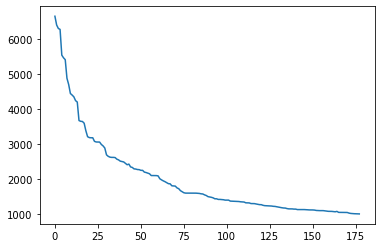

In [111]:
plt.plot(rivers["Length (km)"])
plt.show()

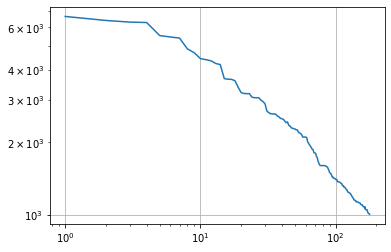

In [112]:
plt.loglog(rivers["Order"],rivers["Length (km)"])
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()

In [113]:
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[5])
y1 = np.log10(y_data[5])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[175])
y2 = np.log10(y_data[175])
print("log(x2) =", x2)
print("log(y2) =", y2)

Get x1 and y1:
log(x1) = 0.7781512503836436
log(y1) = 3.737510690673476
Get x2 and y2:
log(x2) = 2.24551266781415
log(y2) = 3.0043213737826426


In [114]:
from sympy import symbols, Eq, solve
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = sol[a]
c = pow(10, sol[c])
print ("a =", a, "c =", c)

a = -0.499665118750857 c = 13375.9835995755


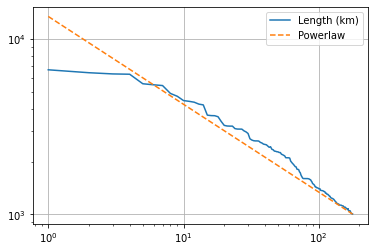

R2:  0.8315986125809024


In [115]:
plt.loglog(rivers["Order"], rivers["Length (km)"], label = "Length (km)")
y = c*rivers["Order"]**a
plt.plot(rivers["Order"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, rivers["Length (km)"])
print("R2: ", r_squared_value)

## 4. Text Laws

__Exercise 7.__ Write python code that

- processes all the files in a given directory, assumed to be text files
- for each file, reads it line by line
- it removes the punctuation signs (say, .,;-?! or whatever) from the line, transforms it to lowercase,
- and maintains a dictionary of (word, frequence of the word in the files).
- Then writes the dictionary as a .csv file with three columns, rank, words, and their frequences, sorted decreasingly by frequence.


Your code might look like (but don't feel forced to follow this pattern):

```
from os import listdir
from os.path import isfile, join, isdir

def readWords(path, output_filename):
    dicc = {}
    for f in listdir(path):
        ff = join(path,f)
        print("processing ",ff)
        for line in open(ff, "r", encoding="utf8"):
            # transform punctuation to spaces in line
            # translate line to lowercase
            for word in line.split():
                # ... something with dicc and word 
    # from dicc, get list of triples (w, freq(w))
    # sort it by freq(w)
    # write it to file output_filename adding index in front
```
---

In [116]:
from os import listdir
from os.path import isfile, join, isdir
import string
import csv

def readWords(path, output_filename):
    dicc = {}
    for f in listdir(path):
        ff = join(path,f)
        print("processing ",ff)
        for line in open(ff, "r", encoding="utf8"):
            # transform punctuation to spaces in line
            new_line = line.translate(str.maketrans('','', string.punctuation))
            lower_line = new_line.lower()
            # translate line to lowercase
            for word in lower_line.split():
                if word in dicc:
                    dicc[word] += 1
                else:
                    dicc[word] = 1
                # ... something with dicc and word 
    dicc = dict(sorted(dicc.items(), key =lambda item: -item[1]))
    rank = 0
    llt = []
    header = ['Order', 'Word', 'Freq']
    for word in dicc:
        llt.append([rank, word, dicc[word]])
        rank += 1
    with open(output_filename, "w" ,encoding='utf8', newline='') as fp:
        writer = csv.writer(fp, delimiter=";")
        writer.writerow(header)
        writer.writerows(llt)
    # from dicc, get list of triples (w, freq(w))
    # sort it by freq(w)
    # write it to file output_filename adding index in front


---

__Exercise 8.__ Try your code e.g. on the file collection in `novels.zip`. Proceeding as before, 
do the word frequencies look like a powerlaw?

---

Notice that `novels.zip` is a zipped file containing text files:

In [56]:
!unzip -l novels.zip

unzip:  cannot find or open novels.zip, novels.zip.zip or novels.zip.ZIP.


In [117]:
readWords("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels.csv")

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

In [118]:
novels = pd.read_csv('novels.csv', sep=';')
print(novels)

       Order                        Word    Freq
0          0                         the  205363
1          1                          of  116457
2          2                         and  100361
3          3                          to   83255
4          4                           a   64033
...      ...                         ...     ...
82952  82952                         423       1
82953  82953               hymenopterous       1
82954  82954                     1228txt       1
82955  82955                     1228zip       1
82956  82956  httpwwwgutenbergorg1221228       1

[82957 rows x 3 columns]


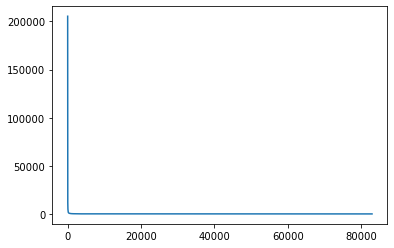

In [119]:
plt.plot(novels["Freq"])
plt.show()

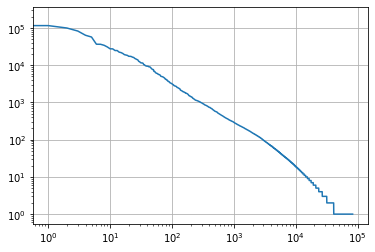

In [120]:
plt.loglog(novels["Order"],novels["Freq"])
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()

In [121]:
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[100])
y1 = np.log10(y_data[100])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[10000])
y2 = np.log10(y_data[10000])
print("log(x2) =", x2)
print("log(y2) =", y2)

Get x1 and y1:
log(x1) = 2.0
log(y1) = 3.4984484031739997
Get x2 and y2:
log(x2) = 4.0
log(y2) = 1.2787536009528289


In [122]:
from sympy import symbols, Eq, solve
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)

a = -1.109847401110585 c = 522568.473684210


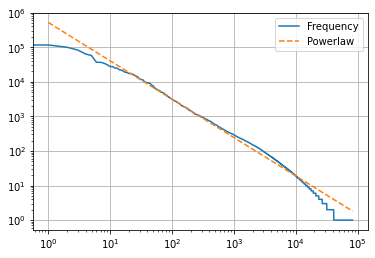

R2 from real values:  0.9924683901458291


In [123]:
plt.loglog(novels["Order"], novels["Freq"], label = "Frequency")
y = c*novels["Order"]**a
plt.plot(novels["Order"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y[100:], novels["Freq"][100:])
print("R2 from real values: ", r_squared_value)

---

__Exercise 9.__  Now do the following test. Change your program so that for some $k$,
it prints the number of _different_ words in the collection after it has read $k$, $2k$, $3k$, $4k$, etc.
words from the collection. Collect the output of pairs $\{ (ik, \mbox{distinct words after reading $ik$ words})\}$.
Create a plot and check whether the distribution looks like a powerlaw.

Actually $y(N)$ is called Heaps' law, and tends to follow a powerlaw with an exponent in $[0..1]$.

---

In [180]:
from os import listdir
from os.path import isfile, join, isdir
import string
import csv

def readWords_k(path, output_filename, k):
    dicc = {}
    i = 1
    n = 1
    ik = []
    diff_w = []
    for f in listdir(path):
        ff = join(path,f)
        print("processing ",ff)
        for line in open(ff, "r", encoding="utf8"):
            # transform punctuation to spaces in line
            new_line = line.translate(str.maketrans('','', string.punctuation))
            lower_line = new_line.lower()
            # translate line to lowercase
            for word in lower_line.split():
                if word in dicc:
                    dicc[word] += 1
                else:
                    dicc[word] = 1
                if n == i*k:
                    ik.append(i*k)
                    diff_w.append(len(dicc))
                    i += 1
                n += 1
                # ... something with dicc and word 
    dicc = dict(sorted(dicc.items(), key =lambda item: -item[1]))
    list = []
    for j in range (0, len(ik)):
        list.append([ik[j],diff_w[j]])
    header = ['ik', 'distinct words']
    with open(output_filename, "w" ,encoding='utf8') as fp:
        writer = csv.writer(fp, delimiter=";")
        writer.writerow(header)
        writer.writerows(list)
    # from dicc, get list of triples (w, freq(w))
    # sort it by freq(w)
    # write it to file output_filename adding index in front

In [181]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 5)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

In [182]:
novels2 = pd.read_csv('novels2.csv', sep=';')
print(novels2)

             ik  distinct words
0             5               5
1            10               9
2            15              14
3            20              16
4            25              19
...         ...             ...
619114  3095575           82957
619115  3095580           82957
619116  3095585           82957
619117  3095590           82957
619118  3095595           82957

[619119 rows x 2 columns]


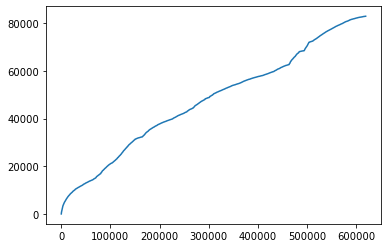

In [183]:
plt.plot(novels2["distinct words"])
plt.show()

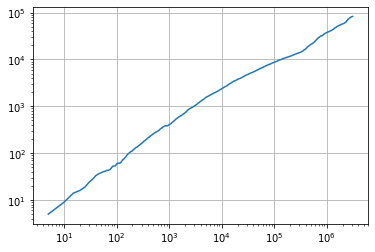

In [184]:
plt.loglog(novels2["ik"],novels2["distinct words"])
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()

In [185]:
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)

Get x1 and y1:
log(x1) = 1.7403626894942439
log(y1) = 1.6020599913279625
Get x2 and y2:
log(x2) = 5.4843069588701
log(y2) = 4.148602654806093


In [186]:
from sympy import symbols, Eq, solve
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)

a = 0.6801764343310205 c = 2.62003023296525


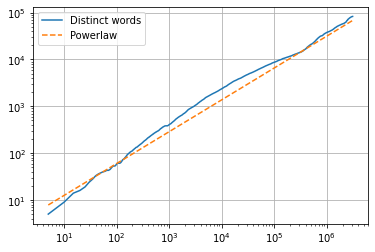

R2 for K = 5:  0.7797832575769567


In [187]:
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 5: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

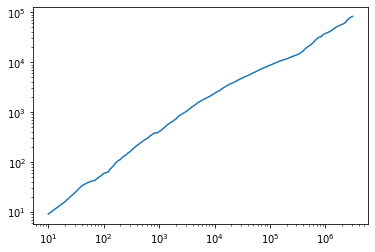

Get x1 and y1:
log(x1) = 1.7403626894942439
log(y1) = 1.6020599913279625
Get x2 and y2:
log(x2) = 5.4843069588701
log(y2) = 4.148602654806093
a = 0.6801764343310205 c = 2.62003023296525


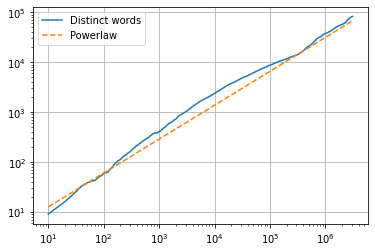

R2 for K = 10:  0.7797824590073132


In [188]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 10)
novels2 = pd.read_csv('novels2.csv', sep=';')
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 10: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

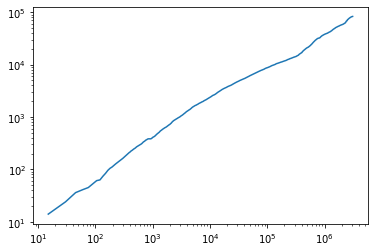

Get x1 and y1:
log(x1) = 2.041392685158225
log(y1) = 1.7853298350107671
Get x2 and y2:
log(x2) = 5.785336954534081
log(y2) = 4.400762417606936
a = 0.6985767934607049 c = 2.28696900557944


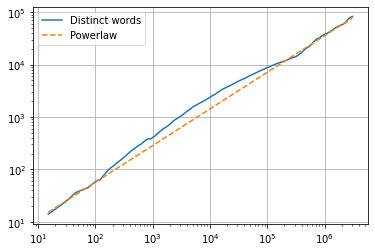

R2 for K = 15:  0.9835031607981267


In [189]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 15)
novels2 = pd.read_csv('novels2.csv', sep=';')
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 15: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

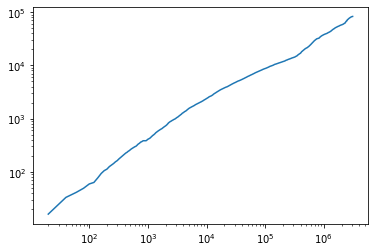

Get x1 and y1:
log(x1) = 2.2174839442139063
log(y1) = 1.9822712330395684
Get x2 and y2:
log(x2) = 5.9614282135897625
log(y2) = 4.553591781870311
a = 0.6867945577778065 c = 2.87948836603178


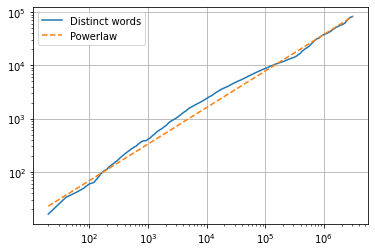

R2 for K = 20:  0.98968612945963


In [190]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 20)
novels2 = pd.read_csv('novels2.csv', sep=';')
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 20: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

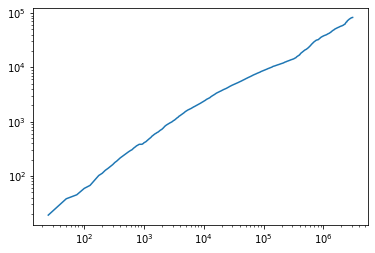

Get x1 and y1:
log(x1) = 2.342422680822206
log(y1) = 2.0969100130080562
Get x2 and y2:
log(x2) = 6.086366950198062
log(y2) = 4.621363258282367
a = 0.6742763950637437 c = 3.29207478263412


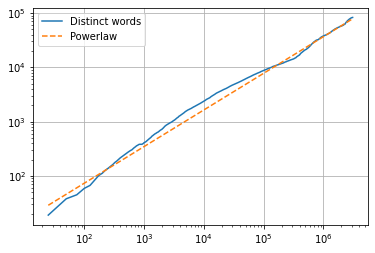

R2 for K = 25:  0.9854478918797437


In [191]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 25)
novels2 = pd.read_csv('novels2.csv', sep=';')
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 25: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

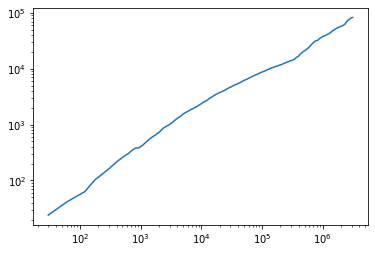

Get x1 and y1:
log(x1) = 2.7403626894942437
log(y1) = 2.444044795918076
Get x2 and y2:
log(x2) = 6.4843069588701
log(y2) = 4.917164031429003
a = 0.6605651840867827 c = 4.30384489439032


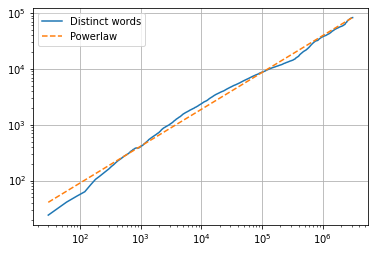

R2 for K = 30:  0.9783863764422105


In [197]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 30)
novels2 = pd.read_csv('novels2.csv', sep=';')
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 30: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

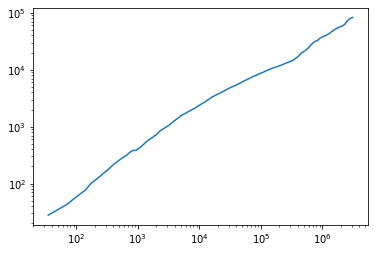

Get x1 and y1:
log(x1) = 2.5185139398778875
log(y1) = 2.2528530309798933
Get x2 and y2:
log(x2) = 6.262458209253744
log(y2) = 4.741451009054546
a = 0.6646995251586724 c = 3.79138607817295


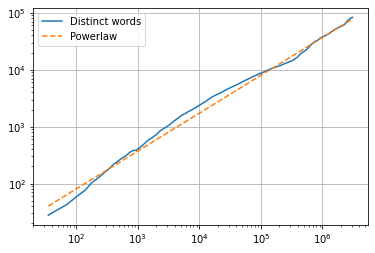

R2 for K = 35:  0.9846603572934556


In [193]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 35)
novels2 = pd.read_csv('novels2.csv', sep=';')
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 35: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

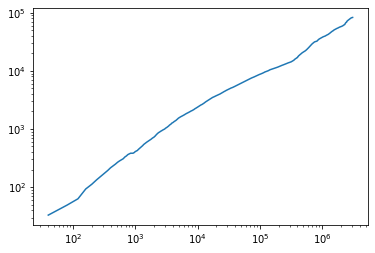

Get x1 and y1:
log(x1) = 2.5854607295085006
log(y1) = 2.3180633349627615
Get x2 and y2:
log(x2) = 6.329404998884357
log(y2) = 4.773998422532553
a = 0.6559753326614582 c = 4.18856127177611


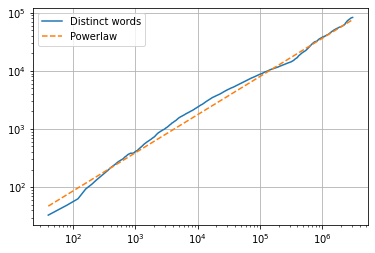

R2 for K = 40:  0.9684731645330797


In [194]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 40)
novels2 = pd.read_csv('novels2.csv', sep=';')
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 40: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

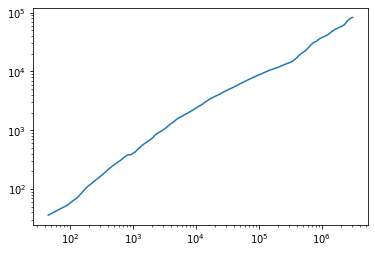

Get x1 and y1:
log(x1) = 2.6434526764861874
log(y1) = 2.3654879848909
Get x2 and y2:
log(x2) = 6.387396945862044
log(y2) = 4.834306233242975
a = 0.6594163990490288 c = 4.19133081069797


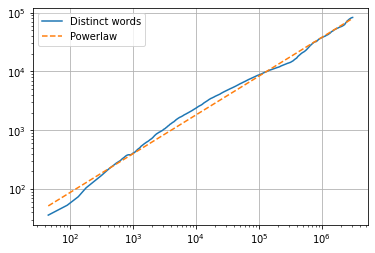

R2 for K = 45:  0.9881050637338215


In [195]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 45)
novels2 = pd.read_csv('novels2.csv', sep=';')
print(novels2)
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 45: ", r_squared_value)

processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4361.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg22566.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg4228.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20826.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg37766.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/27531-0.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/PoeWorksVol2.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg38498.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/RiceBurroughsAprincessofMars.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg17326.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg20939.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg43550.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg1410.txt
processing  /home/valeria/Dades/Tercer/CAI/Lab1/novels/pg14458.txt
processing  /home/valeria/Dades/Tercer/

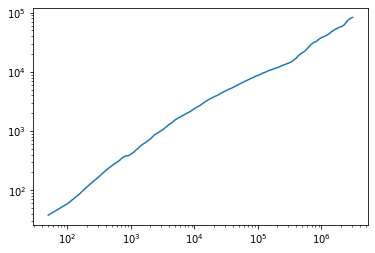

Get x1 and y1:
log(x1) = 2.694605198933569
log(y1) = 2.406540180433955
Get x2 and y2:
log(x2) = 6.438549468309425
log(y2) = 4.889688192665259
a = 0.6632438502203605 c = 4.16255374026648


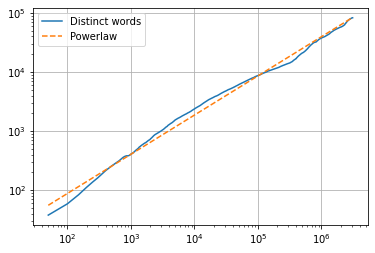

R2 for K = 50:  0.976074489768102


In [196]:
readWords_k("/home/valeria/Dades/Tercer/CAI/Lab1/novels/", "novels2.csv", 50)
novels2 = pd.read_csv('novels2.csv', sep=';')
print(novels2)
plt.loglog(novels2["ik"], novels2["distinct words"])
plt.show()
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[10])
y1 = np.log10(y_data[10])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[61000])
y2 = np.log10(y_data[61000])
print("log(x2) =", x2)
print("log(y2) =", y2)
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = float(sol[a])
c = pow(10, sol[c])
print ("a =", a, "c =", c)
plt.loglog(novels2["ik"], novels2["distinct words"], label = "Distinct words")
y = c*novels2["ik"]**a
plt.plot(novels2["ik"], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
r_squared_value = r2_score(y, novels2["distinct words"])
print("R2 for K = 50: ", r_squared_value)

## 5. Rules of delivery

- No plagiarism; don't discuss your work with other teams. You can ask for help to others for simple things, such as recalling a python instruction or module, but nothing too specific to the session. 

- If you feel you are spending much more time than the rest of the classmates, ask us for help. Questions can be asked either in person or by email, and you'll never be penalized by asking questions, no matter how stupid they look in retrospect.

- Write a short report with your results and thoughts on the Zipf's and Heaps' tests. Make it at most _2 pages_, so you cannot put large tables or plots - we are not interested in these. Explain things like: What best values of ($a$,$b$,$c$) did you find? How did you find them - what method did you use? You are welcome to add conclusions and findings that depart from what we asked you to do. We encourage you to discuss the difficulties you find; this lets us give you help and also improve the lab session for future editions.

- Turn the report to PDF. Make sure it has your names, date, and title.

- Submit your work through the [raco](http://www.fib.upc.edu/en/serveis/raco.html). There will be a `Practica` open for each report.

- Deadline: Work must be delivered __within 2 weeks__ from the end of the lab session. Late submissions risk being penalized or not accepted at all. If you anticipate problems with the deadline, tell us as soon as possible.

## 6. Potentially useful links and tips

- `matplotlib`: 
    - https://matplotlib.org/stable/tutorials/introductory/pyplot.html 
    - https://matplotlib.org/stable/gallery/index.html
    - https://xn--llions-yua.jutge.org/upc-python-cookbook/index.html

- [logarithmic axes](https://www.science-emergence.com/Articles/How-to-put-the-y-axis-in-logarithmic-scale-with-Matplotlib-/)

- reading csv: with [pandas](https://xn--llions-yua.jutge.org/python/fitxers-i-formats.html) or with [csv](https://realpython.com/python-csv/)

- punctuation: for loops are ok, but if you want to see other methods, e.g. [regular expressions](https://stackoverflow.com/questions/34860982/replace-the-punctuation-with-whitespace)

- for more examples of powerlaws everywhere, see https://en.wikipedia.org/wiki/Power_law#Examples